In [1]:
from IPython.display import HTML

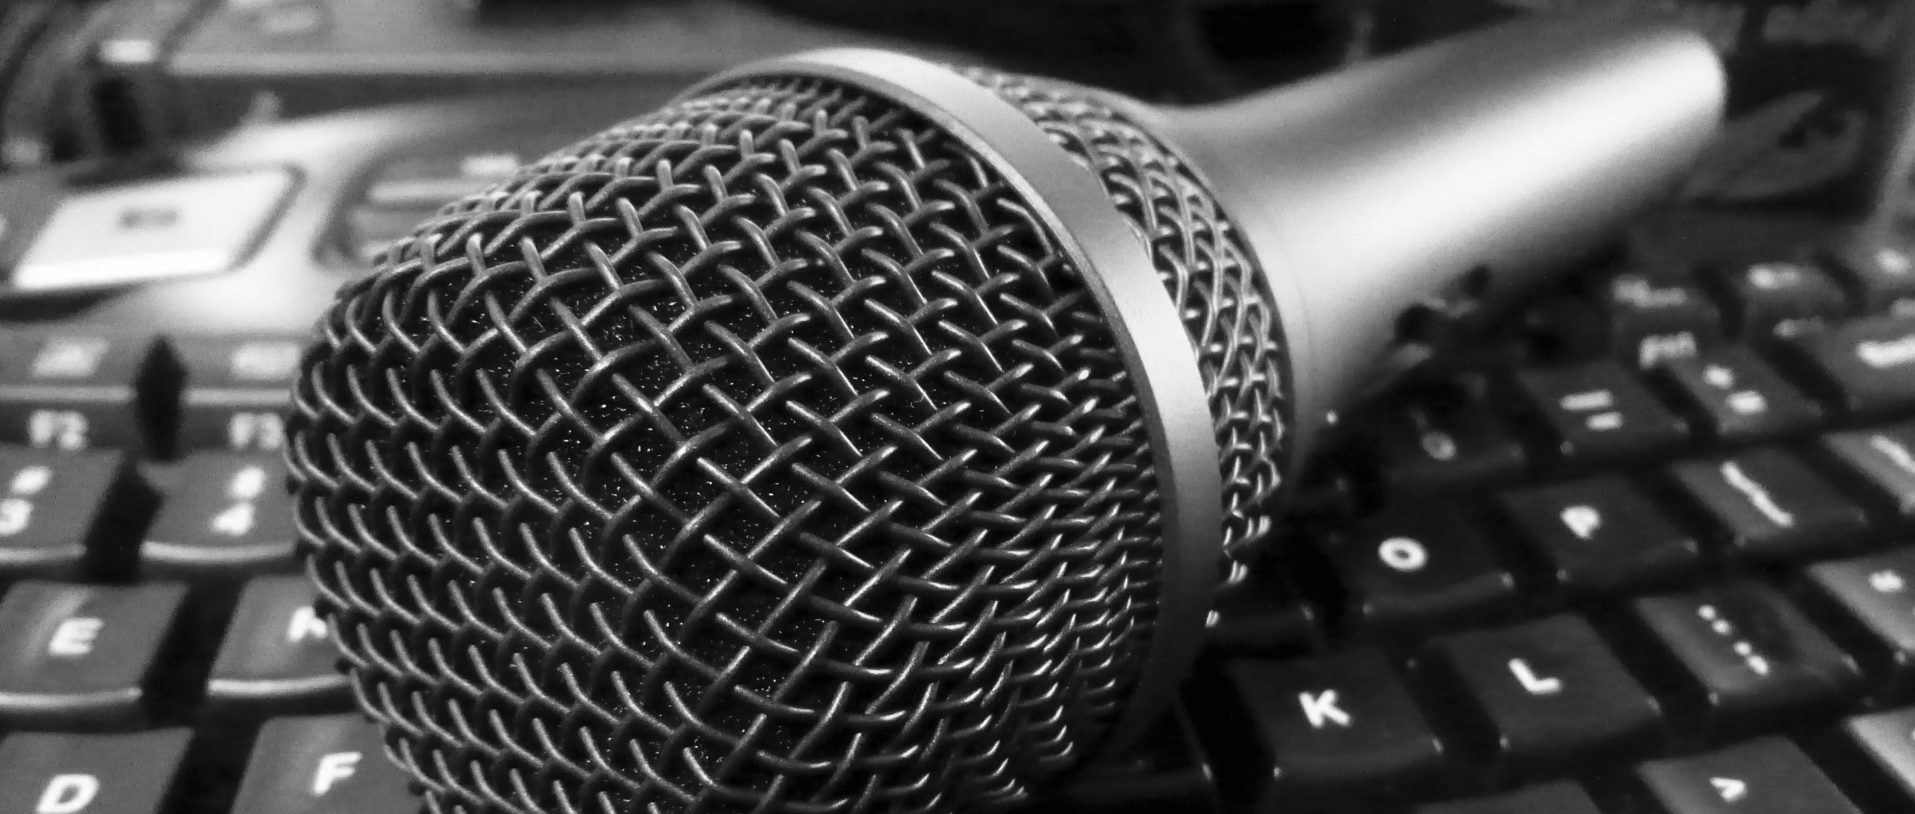

In [2]:
from IPython.display import Image
Image("pcastbanner.png")

Project 1: Analysis on Podcast Data
 =====================

**By: Pieter Leffers**,
*Starting Date: March 5, 2018*

Project Description
-----------

Recently a friend and associate of mine has been interested in trying to create a podcast for a fairly specific topic and a niche audience. However, he is new to the podcasting world and is looking to acquire some analyses on podcasts in order to help provide some basic information for him so he can make some decisions about the show format; and any aspects about podcasting that I may be able to provide. *Here is the caveat*: he is needs to pitch this idea as early as next week, since he is busy doing his normal 9 to 5, he hired me to put in approximately 20 hours of time to gather data and put together something that is worth presenting to his stakeholders. 

    I thought this was an excellent example of a real-world problem where some analyses needs to be provided in a situation where data can be scarce. This is the kind of problem I imagine small startup organizations would be facing or specialized projects within companies that don't have readily available data for such a task.
    
   With his permission I decided to turn this into a project that is worth posting on my blog / github so that I can have a polished analysis which I have yet to provide on my site; essentially killing two birds with one stone.

Data Source(s):
    ---------

I pulled data from **data.world** published by Brandon Telle of podcast episodes published between 2007 and 2016. I believe this dataset was sourced from a number of different places; namely:
    - allpodcasts.com
    - publicradiofan.com
    - newtimeradio.com
    - itunes.apple.com
    - podcastpedia.org
    - godcast1000.com

There are two datasets that are from data.world that I will be using. A *Shows* dataset that has 16 columns and over 32,000 entries. The other dataset I will be using is the *Episodes* dataset that has 1263723 rows and 17 columns. Further details of the datasets are provided below.
    
**Source:** https://data.world/brandon-telle/podcasts-dataset

**Author Github:** https://github.com/btelle/podcasts-dataset


___________________________________




Analysis
=========

*Import packages*

In [45]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re


%matplotlib inline
#sns.set_style('whitegrid')

In [2]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [3]:
location=os.getcwd()
episodes=pd.read_csv(location+'/data/episodes.csv')
shows=pd.read_csv(location+'/data/shows.csv')

Shows
--------

Column names and dataset information for **Shows** dataset

In [4]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32832 entries, 0 to 32831
Data columns (total 16 columns):
id                 32832 non-null object
feed_url           32832 non-null object
title              31524 non-null object
subtitle           26086 non-null object
description        30082 non-null object
summary            27287 non-null object
author             30120 non-null object
email              27256 non-null object
link               15358 non-null object
language           32479 non-null object
explicit           32832 non-null int64
image              30471 non-null object
category           30421 non-null object
subcategory        19473 non-null object
created_at         32832 non-null object
last_build_date    32832 non-null object
dtypes: int64(1), object(15)
memory usage: 4.0+ MB


In [5]:
shows[:5]

,id,feed_url,title,subtitle,description,summary,author,email,link,language,explicit,image,category,subcategory,created_at,last_build_date
0,0002da5f-49a2-31ba-b44c-cdeabdf113cb,http://www.cbc.ca/podcasting/includes/dispatch...,Dispatches from CBC Radio,NaN,CBC Radio's Dispatches host Rick MacInnes-Rae ...,CBC Radio's Dispatches host Rick MacInnes-Rae ...,CBC Radio,podcasting@cbc.ca,http://www.cbc.ca/podcasting,en-ca,0,http://www.cbc.ca/podcasting/images/promo-disp...,News & Politics,Public Radio,2016-11-27T03:15:54,2016-11-27T03:15:54
1,00044845-beb8-35f3-99e2-01dbcfb6eb63,http://everydayissaturday.com/feed/podcast/,Motivation | Inspiration| Success with Entrepr...,Motivation - Inspiration - Success - Mindset -...,Sam Crowley delivers million dollar motivation...,Sam Crowley delivers million dollar motivation...,Sam Crowley,sam@everydayissaturday.com,http://everydayissaturday.com,en-us,0,http://everydayissaturday.com/wp-content/uploa...,Business,Business,2016-11-26T19:11:59,2016-11-21T14:19:34
2,00048bfa-8363-3f10-ac8e-8f27a31fe11f,http://disability411.jinkle.com/disability411.xml,Disability411 Podcast,NaN,Disability411 - The Podcast for Disability Inf...,NaN,Beth Case,NaN,http://disability411.jinkle.com/,en-us,0,NaN,Government & Organizations,Business,2016-11-27T00:37:30,2016-11-27T00:37:30
3,0005ab14-ea88-3038-b82c-86366713e96a,http://stevenredant.podomatic.com/rss2.xml,Steven Redant's Podcast,"Energy for your work out, your travels and you...",En example of what happened on my dance floor ...,En example of what happened on my dance floor ...,Steven Redant (the RedAnt),NaN,NaN,en-gb,0,https://assets.podomatic.net/ts/b8/34/09/steve...,Music,NaN,2016-11-26T18:37:07,2016-11-26T18:37:07
4,0005eac4-fa5d-3c33-a354-ad7928f3705b,http://api.spokenlayer.com/feed/channel/v1-wir...,WIRED News – Spoken Edition,NaN,Get in-depth coverage of current and future tr...,Get in-depth coverage of current and future tr...,WIRED,distribution@spokenlayer.com,http://www.spokenlayer.com,en,0,\n http://media.spokenlayer...,Technology,NaN,2016-11-27T06:46:08,2016-11-25T08:11:13


In [6]:
shows.columns

Index(['id', 'feed_url', 'title', 'subtitle', 'description', 'summary',
       'author', 'email', 'link', 'language', 'explicit', 'image', 'category',
       'subcategory', 'created_at', 'last_build_date'],
      dtype='object')

Episodes
----------

Column names and dataset information for **Episodes** dataset

In [7]:
episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263724 entries, 0 to 1263723
Data columns (total 17 columns):
id                 1263724 non-null object
show_id            1263724 non-null object
title              1263681 non-null object
link               1068796 non-null object
guid               1245808 non-null object
subtitle           1121745 non-null object
description        1152862 non-null object
summary            748512 non-null object
author             780648 non-null object
audio_url          1263723 non-null object
audio_file_size    1263724 non-null int64
audio_mime_type    1263582 non-null object
category           315609 non-null object
explicit           1263724 non-null int64
length             1263724 non-null int64
pub_date           1262487 non-null object
keywords           612290 non-null object
dtypes: int64(3), object(14)
memory usage: 163.9+ MB


In [8]:
episodes[:5]

,id,show_id,title,link,guid,subtitle,description,summary,author,audio_url,audio_file_size,audio_mime_type,category,explicit,length,pub_date,keywords
0,0000209c-904f-3794-a8d7-283a70cf993c,8ab10fd5-1acb-330e-be52-beebf19f0703,DJ DA KID QUEST MARCH 14TH MIXSHOW LIVE ON MIX...,https://www.podomatic.com/podcasts/teamosmnetw...,http://teamosmnetwork.podomatic.com/entry/2008...,DJ THA KID QUEST INTRO 9TH WARD FT JD - ADD ME...,"<img src=""http://assets.podomatic.net/ts/e7/04...",DJ THA KID QUEST INTRO 9TH WARD FT JD - ADD ME...,NaN,http://teamosmnetwork.podOmatic.com/enclosure/...,81099614,audio/mpeg,NaN,1,5571,2008-03-19T17:21:46,"2pac,97,akon,ali,amazing,andre,ashanti,autogra..."
1,000020d5-40ec-351e-aa7a-e8af775de245,16f67b61-d35c-38fa-9bfb-36146d2be45b,Back To Goa - Kameleon part 2 (Archaic Revival),http://max99.libsyn.com/back-to-goa-kameleon-p...,be56007c5636418ce74c58b75dade7f3,Special part 2 of 2 of Back To Goa Pangea spec...,"<p style=""margin: 0.0px 0.0px 0.0px 0.0px; fon...",NaN,NaN,http://traffic.libsyn.com/max99/Back_To_Goa_-_...,189289362,audio/mpeg,NaN,0,1243,2011-10-08T21:15:00,"to,back,trance,pangea,goa,psy,kameleon"
2,00002c78-6813-32f3-b51e-5dc489f4aa4d,3c8297b9-a093-3914-b65d-a0767152d3ec,"The Love Doctors October 18, 2016",NaN,http://media.ccomrcdn.com/media/station_conten...,Hour 2,Hour 2,Hour 2,Dano,http://media.ccomrcdn.com/media/station_conten...,0,audio/mpeg,NaN,0,600,2016-10-18T19:37:29,NaN
3,000033bd-410b-3104-8b1f-7bf51dffc360,365fe300-faea-33dc-9641-ad7d5255b4cb,DC #734: Homeboys in Outer Space,http://tvfanonline.libsyn.com/dc-734-homeboys-...,b18663b9d78841615c8d1c7519c81afc,On today's Daytime Confidential podcast Luke K...,<p>On today's Daytime Confidential podcast Luk...,NaN,NaN,http://dts.podtrac.com/redirect.mp3/traffic.li...,148688587,audio/mpeg,NaN,0,2316,2013-09-10T19:30:00,"and,the,of,to,life,live,all,young,one,our,chil..."
4,00003ab0-d27f-36d2-ad6e-97bdf8792c6a,1e68c732-71b5-3ffd-abdc-70dae84bf9c2,News in Slow Spanish Latino - Episode# 95 - Sp...,http://nsslatino.libsyn.com/news-in-slow-spani...,50fa1e6e6f43b3465ad16f632b7e78c3,Comenzaremos el programa hablando de la decisi...,"<p class=""p1"">Comenzaremos el programa habland...",NaN,NaN,http://traffic.libsyn.com/nsslatino/nssl95.mp3...,29465361,audio/mpeg,NaN,0,1838,2015-03-31T21:48:36,"podcast,mexico,language,pronunciation,grammar,..."


Data Cleaning
=========

*In this hidden portion I do some cleaning of the data in order to perform analyses.*

In [9]:
import re

In [10]:
#Removing Punctuation and URL/Web Addresses, will work with pandas variable
import re
def scrubadub(variable):
    myList=(list(variable))
    clean=[]
    for i in range(0,len(myList)):
        #Regular expressions for removing web addresses
        url_reg  = r'[a-z]*[:.]+\S+'
        #and replacing with nothing
        url_text=re.sub(url_reg, '', myList[i])
        sep = " "
        junk = re.findall(r"(?i)\b[a-z]+\b", url_text)
        #join the seperated words
        junk = sep.join(junk)
        #remove _s_ spaces from text after punctuation removal
        S_space = re.sub(r' s ','',junk)
        clean.append(S_space)
    return clean

In [11]:
#Replace NaNs 
shows['title'].fillna(value='',inplace=True)
shows['description'].fillna(value='',inplace=True)
shows['subtitle'].fillna(value='',inplace=True)
shows['summary'].fillna(value='',inplace=True)
shows['author'].fillna(value='',inplace=True)
shows['category'].fillna(value='',inplace=True)
shows['subcategory'].fillna(value='',inplace=True)

In [12]:
shows['title']=pd.DataFrame(scrubadub(shows['title']))
shows['subtitle']=pd.DataFrame(scrubadub(shows['subtitle']))
shows['description']=pd.DataFrame(scrubadub(shows['description']))
#shows['author']=pd.DataFrame(scrubadub(shows['author'])) #Descided to leave urls in there as useful author information
shows['category']=pd.DataFrame(scrubadub(shows['category']))
shows['subcategory']=pd.DataFrame(scrubadub(shows['subcategory']))

In [13]:
#def addCommas(variable):
#    comma=[]
#    myList=list(variable)
#    for i in range(0,len(myList)):
#        add_comma = re.sub(r' ',',',myList[0])
#        commaSep=myList[i].split()
#        comma.append(commaSep)
#    return pd.Series(comma)

In [14]:
#Shows Dataset
#create a new dataset of reduced size for sharing
#this is also useful for looking at the file in a seperate window while working 
#this is additionally useful for inspecting the data to see if anything needs cleaning
table=shows[['feed_url','title','subtitle','description','author','link','explicit','category','subcategory']]
table.to_csv('smallShows.csv', sep=',')

#observation 1: some podcast fields are blank such as description, author,category,subcategory etc.
#observation 2: some podcasts have ??????? across the board
#observation 3: some fields are duplicated and/or have text belonging in one field entered in another
#observation 4: despite the problems in observation 3, 
#               the important stuff IS generally correct in fields for the most part, such as (title,author,category,subcategory)


In [15]:
#Replace NaNs 
episodes['description'].fillna(value='',inplace=True)
episodes['subtitle'].fillna(value='',inplace=True)
episodes['summary'].fillna(value='',inplace=True)
episodes['audio_mime_type'].fillna(value='',inplace=True)
episodes['author'].fillna(value='',inplace=True)
episodes['keywords'].fillna(value='',inplace=True)
episodes['category'].fillna(value='',inplace=True)

In [16]:
episodes['description']=pd.DataFrame(scrubadub(episodes['description']))
episodes['subtitle']=pd.DataFrame(scrubadub(episodes['subtitle']))
episodes['summary']=pd.DataFrame(scrubadub(episodes['summary']))
#episodes['author']=pd.DataFrame(scrubadub(episodes['summary'])) #Descided to leave urls in there as useful author information
episodes['keywords']=pd.DataFrame(scrubadub(episodes['keywords']))
episodes['category']=pd.DataFrame(scrubadub(episodes['category']))

In [17]:
#Episodes Dataset
table=episodes[['title','link','subtitle','description','summary','audio_url','audio_file_size','audio_mime_type','category','explicit','length','keywords']]
table.to_csv('smallEpisodes.csv', sep=',')

#observation 1: Essentially the same problem with the 'Shows' dataset exist in the 'Episodes' dataset

Descriptive Statistics
-----------------

<em>**Audio File Size**</em>

Although it may not be an *exacting* metric but audio file size could be a decent proximate for audio file and podcast quality. Meaning, by extending that logic we can also assume that audio file size could help gauge studio resources put into audio quality of the podcast. Meaning, we could assume that if a studio had a great deal of specialized sound equipment designed for making a dynamic podcast, the audio file size would be larger than if a studio only had a laptop and a built-in microphone. This is not taking into account readily available compression methods that could have a dramatic effect on that assumption, but I feel the logic still stands. 

In [18]:
print('Audio file counts where the size is greater than 0 bytes:',episodes['audio_file_size'][episodes['audio_file_size']>0].count())

Audio file counts where the size is greater than 0 bytes: 1181850


In [19]:
print('Maximum audio file size:',episodes['audio_file_size'].max())
print('If the unit is in bytes I divided the output to show megabytes')
print('Therefore, the output is saying that',episodes['audio_file_size'].max()/1000000,'\n is a little over 2 gigabytes')

Maximum audio file size: 2147483647
If the unit is in bytes I divided the output to show megabytes
Therefore, the output is saying that 2147.483647 
 is a little over 2 gigabytes


In [20]:
print('Minimum audio file size:',episodes['audio_file_size'].min()/1000000)

Minimum audio file size: 0.0


In [21]:
print('Average audio file size is',episodes['audio_file_size'].mean()/1000000,'+-',episodes['audio_file_size'].std()/1000000,'megabytes')

Average audio file size is 42.644691630298226 +- 91.69328121985227 megabytes


In [22]:
print('Median audio file size:',episodes['audio_file_size'].median()/1000000)

Median audio file size: 26.749712


<em>**Plots of audio file size**</em>

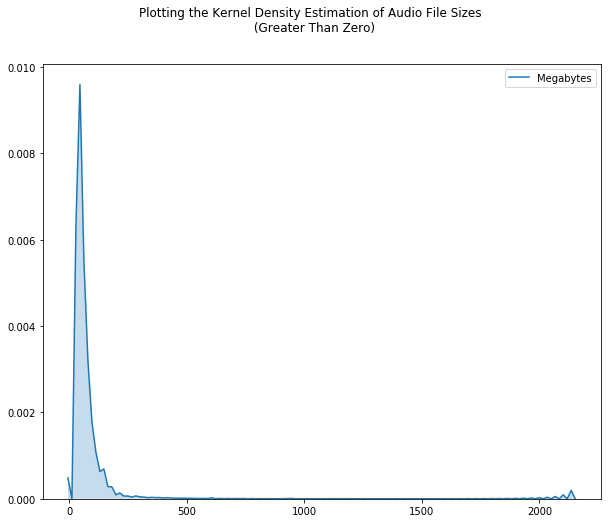

In [23]:
#audio file sizes greater than zero bytes
plt.figure(figsize=(10,8))
gt_zero=(episodes['audio_file_size'][episodes['audio_file_size']>100000])/1000000
sns.kdeplot(gt_zero,bw='silverman',label="Megabytes", shade=True)
plt.suptitle("Plotting the Kernel Density Estimation of Audio File Sizes \n (Greater Than Zero)")
plt.show()

*There seems to be a lot of very small file sizes to me it stands to reason that a podcast audio file should be substantially larger than a single megabyte.*

**Plot Explanation:** From the Kernel Density Estimation we can see that the data is highly skewed towards smaller file sizes. 

*Time*

In [24]:
#In this part I am assuming considering the numbers in output that the audio file sizes
#        are measured in bytes and not kilobytes
# Simple Unit Conversions:
# 1 Second = 1000 milliseconds
# 1 minute = 60000 milliseconds
# 1 hour = 3600000
#
# 1 minute = 60 seconds
# 1 hour = 3600 seconds
# Therefore:
print('Time Unit Conversions:')
print('There are',5*60000,'milliseconds in 5 minutes.')
print('There are',120*60000,'milliseconds in 2 hours.')
print('There are',5*60,'seconds in 5 minutes.')
print('There are',2*3600,'seconds in 2 hours.')
print('There are',2.5*3600,'seconds in 2.5 hours.')
print('There are',4*3600,'seconds in 4 hours.')
print('There are',5.5*3600,'seconds in 5.5 hours.')

Time Unit Conversions:
There are 300000 milliseconds in 5 minutes.
There are 7200000 milliseconds in 2 hours.
There are 300 seconds in 5 minutes.
There are 7200 seconds in 2 hours.
There are 9000.0 seconds in 2.5 hours.
There are 14400 seconds in 4 hours.
There are 19800.0 seconds in 5.5 hours.


In [25]:
gt_zero=episodes['length'][episodes['length']>0]
print('Broadcast length count where length is greater than 0:',gt_zero.count())

Broadcast length count where length is greater than 0: 1247987


In [26]:
print('Maximum broadcast length:',episodes['length'].max())
print('Based on this number I assume that the time unit is in milliseconds.')
print('If the broadcast time unit is in milliseconds than this broadcast would be',gt_zero.max()/300000,'minutes \n or ',gt_zero.max()/7200000,'hours. \n')
print('If the broacast time unit is in seconds instead, the maximum broadcast time would be',gt_zero.max()/300,'minutes \n or',gt_zero.max()/7200,'hours. \n')
print('It is highly possible the outliers may be coded in milliseconds whereas the bulk of the data is in seconds.')

Maximum broadcast length: 201326592
Based on this number I assume that the time unit is in milliseconds.
If the broadcast time unit is in milliseconds than this broadcast would be 671.08864 minutes 
 or  27.9620266667 hours. 

If the broacast time unit is in seconds instead, the maximum broadcast time would be 671088.64 minutes 
 or 27962.0266667 hours. 

It is highly possible the outliers may be coded in milliseconds whereas the bulk of the data is in seconds.


In [27]:
print('Minimum broadcast length:',episodes['length'].min())

Minimum broadcast length: 0


*Time will need to be restricted to values that appear reasonable for a podcast (hidden)* 

In [28]:
FiveMin2hrs_milli=episodes[(episodes.length >=(300000)) & (episodes.length < (7200000))].copy()#milliseconds
FiveMin2hrs_sec=episodes[(episodes.length >=(300)) & (episodes.length < (9000))].copy()# seconds
FiveMin2hrs_sec=FiveMin2hrs_sec.reset_index(drop=True) #need to reset the index

#ThreeHrsToEnd=episodes[episodes.length >19800.0].copy()# investigating broadcast lengths greater than  2 hours.
#There appears to be a dramatic jump in broadcast times after 5.5 hours.
milliseconds=FiveMin2hrs_milli['length']
seconds=FiveMin2hrs_sec['length']

*Upon investigation it appears the bulk of the data lies in the seconds range and that indeed the outliers may be in milliseconds.*

In [29]:
#print('Upon investigation it appears the bulk of the data lies in the seconds range and that indeed the outliers may be in milliseconds.')
print('Reducing the observations to between 5 minutes to 2 hours.')
print('Average broadcast length:',seconds.mean()/60,'+-',seconds.std()/60,'minutes')

Reducing the observations to between 5 minutes to 2 hours.
Average broadcast length: 32.32497578802083 +- 19.592784197006736 minutes


In [30]:
medFiveMin2hrs=seconds.median()
print('Median broadcast length:',medFiveMin2hrs/60,'minutes.')

Median broadcast length: 30.183333333333334 minutes.


*Plot of broadcast time*

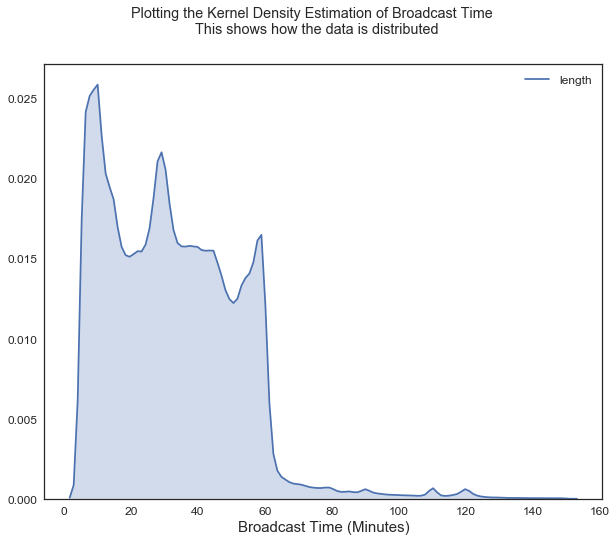

In [31]:
rc={'font.size': 12, 'axes.labelsize': 15, 'legend.fontsize': 12.0, 
    'axes.titlesize': 12, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(style="white", color_codes=True,rc=rc)


plt.figure(figsize=(10,8))

sns.kdeplot(seconds/60,bw='silverman', shade=True)
plt.suptitle("Plotting the Kernel Density Estimation of Broadcast Time \n This shows how the data is distributed")
plt.xlabel('Broadcast Time (Minutes)')
plt.show()

**Plot Explanation:** We can see based on the distribution that most of the episodes peak at just about 10-15 minutes and then again at around 25-30 minutes and finally peak once again at a little more than 60 minutes, or 1 hour. So it seems pretty clear the most common ending times are:
    - 10 min
    - 30 min
    - 60 min

File Size and Broadcast Length
----------------------------------------------------

In [32]:
#Having difficulties changing joinplot axis labels so I'm doing it the hard way
#FiveMin2hrs_sec.rename(index=str, columns={'audio_file_size': 'Audio File Size', 'length': 'Length'},inplace=True)

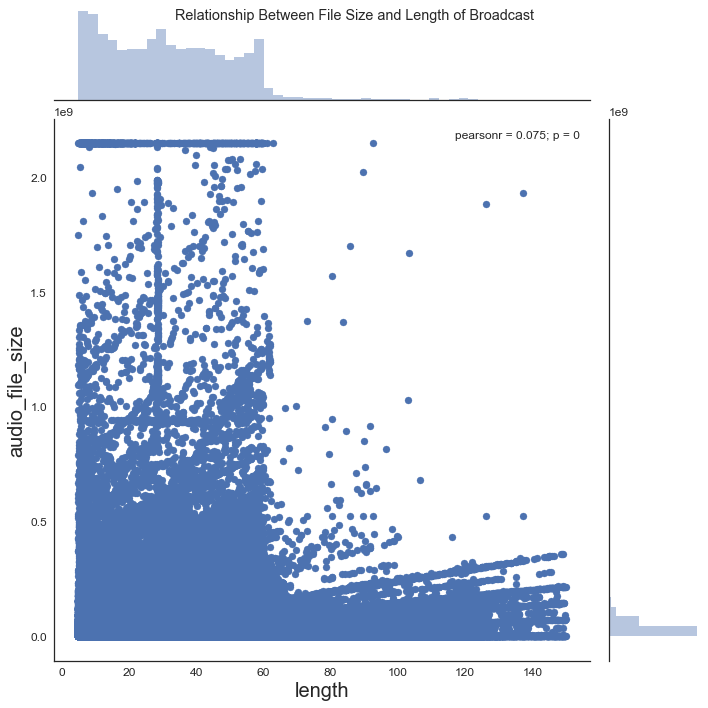

In [33]:
rc={'font.size': 12, 'axes.labelsize': 20, 'legend.fontsize': 12.0, 
    'axes.titlesize': 12, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(style="white", color_codes=True,rc=rc)



plt.figure(figsize=(14,10))

modLength=seconds/60
sns.jointplot(x=modLength, y='audio_file_size', data=FiveMin2hrs_sec, size=10)
plt.suptitle('Relationship Between File Size and Length of Broadcast')
#plt.ylabel('File Size')
#plt.xlabel('Broadcast Time (Minutes)')
plt.show()

**Plot Explanation:** We can see from this plot that my initial assumption was incorrect and that file size poorly describes episode length. Point of fact we can see a correlation of less than one.

In [34]:
#maximum bitrate final compression size

File Size and Broadcast Length (By File Type)
----------------------------------------------------

*Clearly podcast audio type will need to be cleaned*

In [35]:
print('The mixed bag of different file types and formats: \n')
formats=FiveMin2hrs_sec['audio_mime_type'].unique()
print(formats)

The mixed bag of different file types and formats: 

['audio/mpeg' 'video/x-m4v' 'video/x-mp4' 'audio/x-m4a' 'video/mp4'
 'audio/mpeg3' 'audio/x-mpg' 'audio/mp4' 'audio/mp3' 'video/mpeg'
 'video/quicktime' 'video/m2v' 'audio/x-mp3' 'audio/x-mpeg' 'x-audio/mpeg'
 'x-audio/mp3' 'MPEG' '' 'audio/x-aac' 'application/octet-stream' 'MP3'
 'video/m4v' '0' 'audio/x-m4b' 'audio/x-ogg' 'application/pdf' 'M4A'
 'audio/mpg' 'audio/x-wav' "Fuhrman's" 'text/plain' 'video/x-pn-realvideo'
 'audio/mp4a-latm' 'video/x-flv' 'audio/x-mpegurl' 'E.' 'video/x-ms-asf'
 'mp3' 'audio/m4a' 'audio/aac' 'video/x-ms-wmv' 'audio' 'application/ogg'
 'Audio/MP4' 'application/unknown' 'image/jpg' '12190542' 'B.'
 'audio / mpeg' 'Audio/mpeg' 'audio/x-aiff' 'audio/ogg' 'audio/x-wave'
 'Langsjoen' 'audio/m4b' 'Jenkins' 'Drisko' 'audio/x-ms-wma'
 'video/x-msvideo' 'Interview' 'video/mov' 'octet-stream' 'video/m4a'
 'audio/wav' 'Messina' 'image/jpeg' 'Krikorian' 'video/webm' 'Sinatra'
 'video/x-mpeg' 'video/x-mov' 'Pribis' 

In [36]:
audio_files=[]
for i in range(0,len(formats)):
    audio_files.append(re.findall(r'audio.*|mp3.*|mpeg.*|ogg.*|m4a.*', formats[i].lower()))
print('All fields listed as Audio Files or in Audio Formats. \n')
print(audio_files)

All fields listed as Audio Files or in Audio Formats. 

[['audio/mpeg'], [], [], ['audio/x-m4a'], [], ['audio/mpeg3'], ['audio/x-mpg'], ['audio/mp4'], ['audio/mp3'], ['mpeg'], [], [], ['audio/x-mp3'], ['audio/x-mpeg'], ['audio/mpeg'], ['audio/mp3'], ['mpeg'], [], ['audio/x-aac'], [], ['mp3'], [], [], ['audio/x-m4b'], ['audio/x-ogg'], [], ['m4a'], ['audio/mpg'], ['audio/x-wav'], [], [], [], ['audio/mp4a-latm'], [], ['audio/x-mpegurl'], [], [], ['mp3'], ['audio/m4a'], ['audio/aac'], [], ['audio'], ['ogg'], ['audio/mp4'], [], [], [], [], ['audio / mpeg'], ['audio/mpeg'], ['audio/x-aiff'], ['audio/ogg'], ['audio/x-wave'], [], ['audio/m4b'], [], [], ['audio/x-ms-wma'], [], [], [], [], ['m4a'], ['audio/wav'], [], [], [], [], [], ['mpeg'], [], [], [], [], ['audio/mpep'], [], [], ['audio/x-mpeg-3'], [], [], [], [], [], [], [], [], ['audio/mp4'], [], [], [], [], ['mpeg/audio'], [], ['audio/x-m4p'], [], ['audio/mpeg '], [], ['audio/mp4'], [], [], ['audio/mpeg4'], ['audio'], [], [], ['audio/mp3']

In [37]:
video_files=[]
for i in range(0,len(formats)):
    video_files.append(re.findall(r'video.*|avi.*|m4v.*', formats[i].lower()))
print('All fields listed as Video Files or in Video Formats. \n')
print(video_files)

All fields listed as Video Files or in Video Formats. 

[[], ['video/x-m4v'], ['video/x-mp4'], [], ['video/mp4'], [], [], [], [], ['video/mpeg'], ['video/quicktime'], ['video/m2v'], [], [], [], [], [], [], [], [], [], ['video/m4v'], [], [], [], [], [], [], [], [], [], ['video/x-pn-realvideo'], [], ['video/x-flv'], [], [], ['video/x-ms-asf'], [], [], [], ['video/x-ms-wmv'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['video/x-msvideo'], [], ['video/mov'], [], ['video/m4a'], [], [], [], [], ['video/webm'], [], ['video/x-mpeg'], ['video/x-mov'], [], ['m4v'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['video/mp4'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['video'], [], [], [], [], [], [], [], [], [], [], [], ['video'], [], [], [], [], [], [], [], [], [], [], [], [], [], ['videoo/x-mpeg'], [], ['video/avi'], [], ['video/3gpp'], [], [], [], [], [], ['video/ogg'], [], [], [], [], [], []]


In [38]:
def createCategories(variable):
    audio_values=[]
    #pattern=variable.unique()
    catList=[]
    for i in variable:
        audio_format=re.findall(r'audio.*|mp3.*|mpeg.*|ogg.*|m4a.*', i.lower())
        audio_values.append(audio_format)
    temp=pd.DataFrame(data=audio_values,columns=[variable.name])    
    print('Size of created dataframe',len(audio_values), 'and size of', variable.name,len(variable))
    for i in range(len(variable)):
        test1=(temp[variable.name][i])
        test2=(variable[i])
        if test1==test2:
            catList.append('1')
        else:
            catList.append('0')
    temp['audio_cat']=catList  
    return temp

In [39]:
#Creating a DataFrame of categoris for merging with larger DataFrame
created_cats=createCategories(FiveMin2hrs_sec['audio_mime_type'])

Size of created dataframe 1101039 and size of audio_mime_type 1101039


In [40]:
#Create variable on larger DataFrame from the categories we just created
FiveMin2hrs_sec['audio_cats']=created_cats['audio_cat']

Audio Formats
-----------------

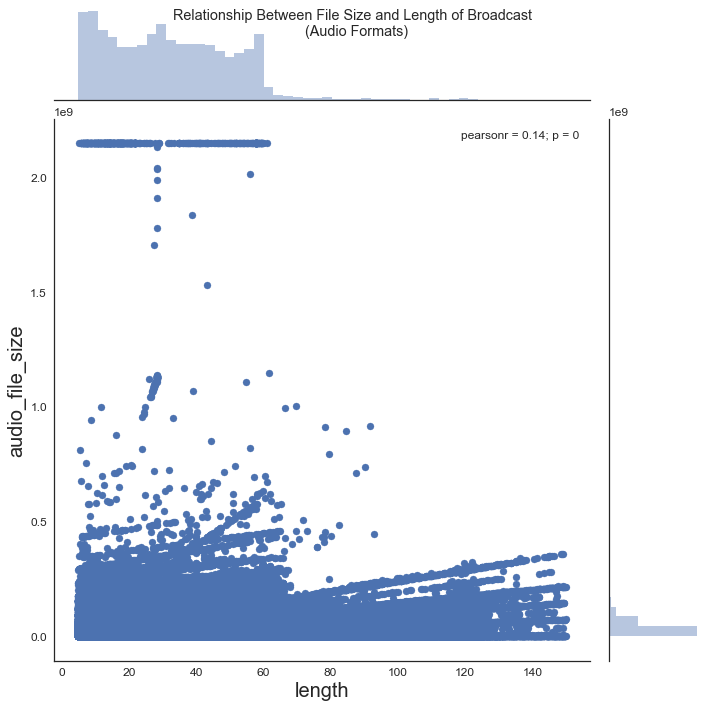

In [41]:
FiveMin2hrs_audio=FiveMin2hrs_sec[(FiveMin2hrs_sec.audio_cats=='1')]# seconds

seconds=FiveMin2hrs_audio['length']
modLength=seconds/60
sns.jointplot(x=modLength, y='audio_file_size', data=FiveMin2hrs_audio, size=10)
plt.suptitle('Relationship Between File Size and Length of Broadcast \n (Audio Formats)\n')
#plt.ylabel('File Size')
#plt.xlabel('\n Broadcast Time (Minutes)')
plt.show()

**Plot Explanation:** We can see that most of the audio formats have a much smaller file size than previously shown.

Video Formats
--------------

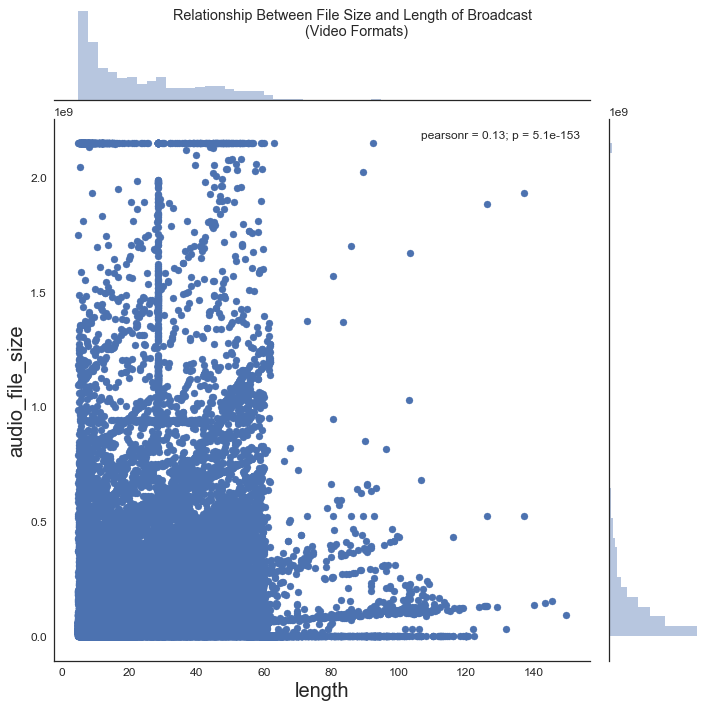

In [42]:
FiveMin2hrs_video=FiveMin2hrs_sec[(FiveMin2hrs_sec.audio_cats=='0')].copy()# seconds
seconds=FiveMin2hrs_video['length']

modLength=seconds/60
sns.jointplot(x=modLength, y='audio_file_size', data=FiveMin2hrs_video, size=10)
plt.suptitle('Relationship Between File Size and Length of Broadcast \n (Video Formats)\n')
#plt.ylabel('File Size')
#plt.xlabel('\n Broadcast Time (Minutes)')
plt.show()

**Plot Explanation:** We can see from this plot that the video formats are much larger in file size than the audio formats.

Show Classification
===========

*We see here a word salad where discrete genre categories should be, cleaning is a necessity:*

In [43]:
showCATformat=shows['category'].unique()
showCATformat

array(['News Politics', 'Business', 'Government Organizations', 'Music',
       'Technology', 'Education', '', 'Info', 'Arts', 'Health',
       'Religion Spirituality', 'Design', 'Sports', 'Romance',
       'Education Language Courses', 'Sports Recreation',
       'Games Hobbies Video Games', 'Society Culture', 'Official Podcast',
       'Blogs', 'Games Hobbies Other Games', 'Games Hobbies',
       'Arts Literature', 'News', 'TV Film', 'Society Culture Philosophy',
       'Religion Spirituality Christianity', 'Technology Gadgets',
       'Arts Entertainment', 'Kids Family', 'Children Young Adults',
       'Comedy', 'Sports R High School', 'Public Radio',
       'Technology Software How To', 'Movies Television', 'Podcasting',
       'podcast', 'sports speedway racing cycles', 'Technology Tech News',
       'Science Fiction', 'null', 'International',
       'Health Fitness Nutrition', 'Arts Design',
       'Sports Recreation Professional', 'Magical Realism',
       'Health Fitness', 'Sci

In [346]:
#Regular Expressions to Identify groups
family_buckets=re.compile(r'family.*|pets.*|dogs.*|child.*|kid.*|mom.*|mother.*|parent.*|father.*|dad.*|young.*|disney.*', flags=re.IGNORECASE)
sport_buckets=re.compile(r'sport.*|nfl.*|fishing.*|mma.*|tam cowan.*|columbus blue jackets.*|mike johnston.*|custer.*|coach.*|martial arts.*|longboarding.*|football.*|wrestl.*|ufc.*|marathon.*|chess.*|hockey.*|basketball.*|bicycle.*|bike.*|baseball.*|soccer.*|buckeyes.*|race.*', flags=re.IGNORECASE)
fiction_buckets=re.compile(r'fiction.*|comedy.*|brenda starr.*|roman.*|fantasy.*|thriller.*|scifi.*|mystery.*|stories.*|drama.*|paranormal.*|godzilla.*|storytelling.*|cyberpunk.*|old time radio.*', flags=re.IGNORECASE)
hobbies_buckets=re.compile(r'hobbie.*|rpg.*|paranormal.*|quilting.*|blogs.*|firearms.*|sewing.*|helene rush.*|comic books.*|photography.*|pinball.*|mario wl.*|pinball.*|horses.*|xbox.*|outdoors.*|animschool.*|guitar.*|motorsport.*|gambling.*|games.*|aviation.*|gaming.*|anime.*|flying.*|comics.*|fun.*|sega.*|world of warcraft.*|wargam.*|sewing.*|knit.*', flags=re.IGNORECASE)
health_buckets=re.compile(r'health.*|medicine.*|weight loss.*|vegan.*|diabetes.*|juice plus training.*|fitness.*|dr eric bailey.*|dave tate.*|weight loss.*|adhd.*|food.*|psychology.*|medical.*|motivation.*|self.*|natural.*|nutrition.*|autism.*|organic.*|overeaters.*', flags=re.IGNORECASE)
politic_buckets=re.compile(r'politic.*|govern.*|hannity.*|limbaugh.*|talk radio.*', flags=re.IGNORECASE)
news_buckets=re.compile(r'news.*|current events.*|nachrichten.*', flags=re.IGNORECASE)
business_buckets=re.compile(r'business.*|current events.*|sales.*|stocks.*|professional.*|leadership.*|brand identity.*|management.*|entrepreneur|investing.*|finance|zakelijk.*|market.*|economics.*', flags=re.IGNORECASE)
industry_buckets=re.compile(r'industry.*|firefighting.*|ncdot.*|acting.*|aviation.*|work.*|auto repair professionals.*|automotive.*|transportation.*|real estate.*|jobs.*', flags=re.IGNORECASE)
music_buckets=re.compile(r'music.*|dj music.*|hip hop.*|musik.*|dee snider.*|dubstep.*|guitar.*|hollywood hollow.*|lady gaga.*|alex b groove.*|jazz.*|funk.*|musica.*|blind blake.*|corr.*|mixtape.*|media.*|britney spears.*|bing futch.*', flags=re.IGNORECASE)
entertainment_buckets=re.compile(r'entertainment.*|comedy.*|television.*|square peg show.*|audio.*|glamour.*|pop culture.*|dick grunert.*|humor.*|fun.*|the signal.*|wheel of time podcasts.*|cowell.*|humor.*|books.*|margaux.*|talk radio.*|tv.*|beauty.*|movies.*|minutes of fame.*', flags=re.IGNORECASE)
arts_buckets=re.compile(r'arts.*|dance.*|theatre.*|literatur.*|ben model.*|sculpt.*|native american art.*', flags=re.IGNORECASE)
film_buckets=re.compile(r'film.*|movie.*', flags=re.IGNORECASE)
science_buckets=re.compile(r'science.*|physics.*|atheism.*|radioactive.*|radioation.*', flags=re.IGNORECASE)
technology_buckets=re.compile(r'tech.*|python.*|computer.*|powershell.*|internet.*|software.*|programming.*|web design.*|gadgets.*|game design.*', flags=re.IGNORECASE)
religious_buckets=re.compile(r'religious.*|occult.*|christian.*|altrincham.*|catholic.*|faith.*|church.*|spirit.*|theology.*|hanuman.*|bible.*|wicca.*|pro life.*|angel.*|buddhism.*|guru.*|espiritismo.*|priest.*|hinduism.*', flags=re.IGNORECASE)
history_buckets=re.compile(r'history.*|cold war.*|war studies essays.*', flags=re.IGNORECASE)
food_buckets=re.compile(r'food.*|wine.*|cooking.*', flags=re.IGNORECASE)
education_buckets=re.compile(r'education.*|prepping.*|law.*|hablar.*|constitution.*|academia.*|legal.*|architecture.*|design.*|cpa preparation.*', flags=re.IGNORECASE)
travel_buckets=re.compile(r'travel.*|thai.*|africa.*|places.*|french.*|hebraic.*|japan.*|familienaufstellung.*|outdoors.*|afrique.*', flags=re.IGNORECASE)
lifestyle_buckets=re.compile(r'lifestyle.*|horses.*|equine.*|women.*|gay.*|lgbt.*|raising chickens.*|home and gardening.*|social issues.*|dating tips.*', flags=re.IGNORECASE)
sexuality_buckets=re.compile(r'sex.*|porn.*', flags=re.IGNORECASE)
#Categories List
cat_labels=['family_buckets','sport_buckets','fiction_buckets','hobbies_buckets','health_buckets','politic_buckets','news_buckets','business_buckets','industry_buckets','music_buckets','entertainment_buckets','arts_buckets','film_buckets','science_buckets','technology_buckets','religious_buckets','history_buckets','food_buckets','education_buckets','travel_buckets','lifestyle_buckets','sexuality_buckets']
cat_buckets=[family_buckets,sport_buckets,fiction_buckets,hobbies_buckets,health_buckets,politic_buckets,news_buckets,business_buckets,industry_buckets,music_buckets,entertainment_buckets,arts_buckets,film_buckets,science_buckets,technology_buckets,religious_buckets,history_buckets,food_buckets,education_buckets,travel_buckets,lifestyle_buckets,sexuality_buckets]

#copy original dataframe that needs to be categorized
#family_cats=pd.DataFrame(shows['category']).copy()
#comparison=pd.DataFrame(shows['category']).copy()
#Replace copied variable with 1 for the identified regular expressions
#family_cats=pd.DataFrame(family_cats.category.str.replace(family_buckets, '1'))
#Replace non-ONE values with zeros, that needs to finally be appended to Dataframe
#family_cats=family_cats.replace(family_cats[family_cats['category']!='1'], '0')
#Copy original dataframe
#comparison['family_cats']=family_cats
#comparison

In [348]:
#This takes a long time!

#copy original dataframe that needs to be categorized
comparison=pd.DataFrame(shows['category']).copy()
#iterate through the different genre categories
for i in range(0,len(cat_labels)):
    temp_cats=pd.DataFrame(shows['category']).copy()
    #Replace copied variable with 1 for the identified regular expressions
    temp_cats=pd.DataFrame(temp_cats.category.str.replace(cat_buckets[i], '1'))
    #Replace non-ONE values with zeros, that needs to finally be appended to Dataframe
    temp_cats=temp_cats.replace(temp_cats[temp_cats['category']!='1'], '0')
    temp.rename(columns={'category': i})
    #Copy original dataframe
    comparison[cat_labels[i]]=temp_cats
comparison

,category,family_buckets,sport_buckets,fiction_buckets,hobbies_buckets,health_buckets,politic_buckets,news_buckets,business_buckets,industry_buckets,...,film_buckets,science_buckets,technology_buckets,religious_buckets,history_buckets,food_buckets,education_buckets,travel_buckets,lifestyle_buckets,sexuality_buckets
0,News Politics,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Business,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Government Organizations,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Music,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Technology,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,Education,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,News Politics,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Technology,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,Business,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [406]:
genreDF=comparison.loc[:,'family_buckets':'sexuality_buckets']
genreDF=genreDF.transpose()
#convert to integer
genreDF=genreDF.iloc[:,0:32831].astype(int)
genreDF['sum_all']=genreDF.iloc[:,0:32831].sum(axis=1)
#genreDF.reset_index(level=0, inplace=True)
#categories=list(genreDF['index'])
#countCats=genreDF['sum_all']

In [414]:
#genreDF

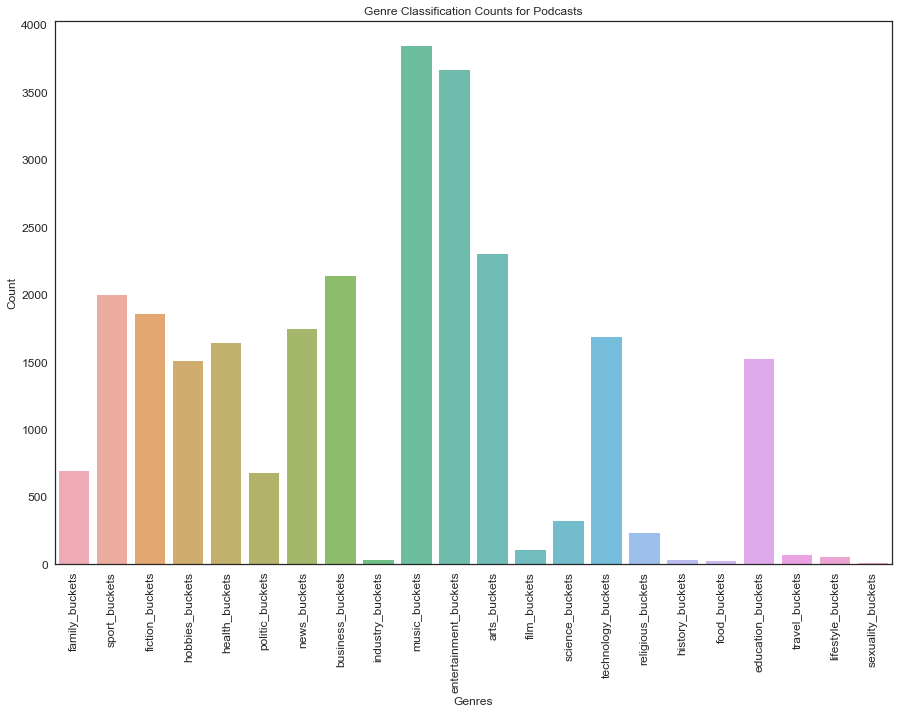

In [417]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
#city_count  = df['City'].value_counts()
#city_count = city_count[:10,]
plt.figure(figsize=(15,10))

plot=sns.barplot(genreDF.index, genreDF.sum_all, alpha=0.8)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.title('Genre Classification Counts for Podcasts')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()


In [ ]:
#radiation professionals